# Telco Customer Churn Prediction

The primary purpose of this dataset is to analyze and predict customer churn. By understanding the factors that contribute to churn, the telecom company can develop strategies to retain customers and reduce churn rates.

**Objective**: 

Predict customer churn (the rate at which customers stop subscription) in a subscription-based business. 

**Goal**: 

Create a model that can accurately identify customers likely to churn based on their usage and demographic data. Meaning identify the features that have the most effect on whether a customer may or may not cancel their subscription

### Import Libraries

In [1]:
import pandas as pd
import numpy as np 
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler
from utils import missing_data, plot_feature_importance

%matplotlib inline

colour_pal = sns.color_palette('flare')
sns.set_palette(colour_pal)

### Data Cleaning & Preparation

In [2]:
df = pd.read_excel("data/Telco_customer_churn.xlsx")
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [3]:
df.shape

(7043, 33)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [5]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


### Missing Data

In [6]:
missing_data(df)

,Total,Percent,Types
CustomerID,0,0.000000,object
Count,0,0.000000,int64
Country,0,0.000000,object
State,0,0.000000,object
City,0,0.000000,object
Zip Code,0,0.000000,int64
Lat Long,0,0.000000,object
Latitude,0,0.000000,float64
Longitude,0,0.000000,float64
Gender,0,0.000000,object


In [7]:
df_copy = df.copy()
df_copy.head()


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [8]:
print(df_copy.shape)

(7043, 33)


#### Drop Repetative Columns

Here the information gained by the following features is already gained by other features. Therefore in order to reduce feature complexity and the number of features the model requires to compute, these columns will be dropped.

Country -  As the data is obtained from the same country it is always USA and therefore a constant

State - Similar to the Country, all the data is obtained from the same State, California and provides little aid to the model predictions

Lat Long - a combination column of the already Latitude and Longitude column and therefore a repatition of information

Churn Label - a text version of the already encoded Churn Value feature. Therefore a repatition

CustomerID - As this is inidivual identifier for each customer it is dropped. There is no repeat CustomerID, i.e. the customer returned after churning, and therefore does not provide information to the overall objective. If more personal information about each individual is aquired this would indeed be a useful numeric column

Count - Not relavant to model training

In [9]:
df_drop = df_copy.drop(columns=['Churn Reason', 'Country', 'State', 'Lat Long', 'Churn Label', 'CustomerID', 'Count'], axis=1)


In [10]:
df_drop.shape

(7043, 26)

In [11]:
# Convert total charges to a numeric column and fill missing values with the mode
df_drop['Total Charges'] = pd.to_numeric(
    df_drop['Total Charges'], errors='coerce')
print(df_drop['Total Charges'].isnull().sum())

11


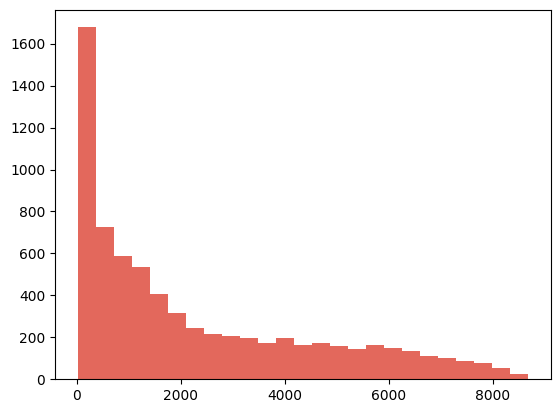

In [12]:
plt.hist(df_drop['Total Charges'], color=colour_pal[1], bins=25)
plt.show()

Total Charges has a skewed distribution and therefore, missing data will be replaced with the median

In [13]:
median = df_drop['Total Charges'].median()
df_drop['Total Charges'] = df_drop['Total Charges'].fillna(median)

In [14]:
df_drop['Total Charges'].isnull().sum()

0

In [15]:
df_drop.columns.values

array(['City', 'Zip Code', 'Latitude', 'Longitude', 'Gender',
       'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection',
       'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract',
       'Paperless Billing', 'Payment Method', 'Monthly Charges',
       'Total Charges', 'Churn Value', 'Churn Score', 'CLTV'],
      dtype=object)

### Encode Categorical Columns

In [16]:
CAT_COLUMNS = ['Gender', 'Senior Citizen',
               'Partner', 'Dependents', 'Tenure Months', 'Phone Service', 'City',
               'Multiple Lines', 'Internet Service', 'Online Security',
               'Online Backup', 'Device Protection', 'Tech Support',
               'Streaming TV', 'Streaming Movies', 'Contract',
               'Paperless Billing', 'Payment Method']
NUM_COLUMNS = ['Count', 'Country', 'State',  'Zip Code', 'Latitude', 'Longitude', 'Monthly Charges',
               'Total Charges', 'Churn Value', 'Churn Score',
               'CLTV']

In [17]:
df_encode = pd.get_dummies(df_drop, columns=CAT_COLUMNS)
df_encode.head(10)

,Zip Code,Latitude,Longitude,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV,Gender_Female,Gender_Male,...,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,90003,33.964131,-118.272783,53.85,108.15,1,86,3239,False,True,...,False,True,False,False,False,True,False,False,False,True
1,90005,34.059281,-118.307420,70.70,151.65,1,67,2701,True,False,...,False,True,False,False,False,True,False,False,True,False
2,90006,34.048013,-118.293953,99.65,820.50,1,86,5372,True,False,...,True,True,False,False,False,True,False,False,True,False
3,90010,34.062125,-118.315709,104.80,3046.05,1,84,5003,True,False,...,True,True,False,False,False,True,False,False,True,False
4,90015,34.039224,-118.266293,103.70,5036.30,1,89,5340,False,True,...,True,True,False,False,False,True,True,False,False,False
5,90020,34.066367,-118.309868,55.20,528.35,1,78,5925,True,False,...,False,True,False,False,True,False,False,True,False,False
6,90022,34.023810,-118.156582,39.65,39.65,1,100,5433,False,True,...,True,True,False,False,False,True,False,False,True,False
7,90024,34.066303,-118.435479,20.15,20.15,1,92,4832,False,True,...,False,True,False,False,True,False,False,False,False,True
8,90028,34.099869,-118.326843,99.35,4749.15,1,77,5789,False,True,...,True,True,False,False,False,True,False,False,True,False
9,90029,34.089953,-118.294824,30.20,30.20,1,97,2915,False,True,...,False,True,False,False,True,False,False,False,True,False


In [18]:
df_encode.shape

(7043, 1253)

In [19]:
df_encode.dtypes

Zip Code                                      int64
Latitude                                    float64
Longitude                                   float64
Monthly Charges                             float64
Total Charges                               float64
                                             ...   
Paperless Billing_Yes                          bool
Payment Method_Bank transfer (automatic)       bool
Payment Method_Credit card (automatic)         bool
Payment Method_Electronic check                bool
Payment Method_Mailed check                    bool
Length: 1253, dtype: object

## EDA & Visualization

### Univariante Analysis

#### Customer Locations

In [20]:
cali_map = gpd.read_file('data/CA_Shapefiles/CA_Counties.shp')
cali_map.to_crs(epsg=4326)
crs = {'init': 'EPSG:4326'}
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
geo_df = gpd.GeoDataFrame(df,
                          crs=crs,
                          geometry=geometry)

/Users/sjo/miniforge3/envs/tensor/lib/python3.11/site-packages/pyproj/crs/crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


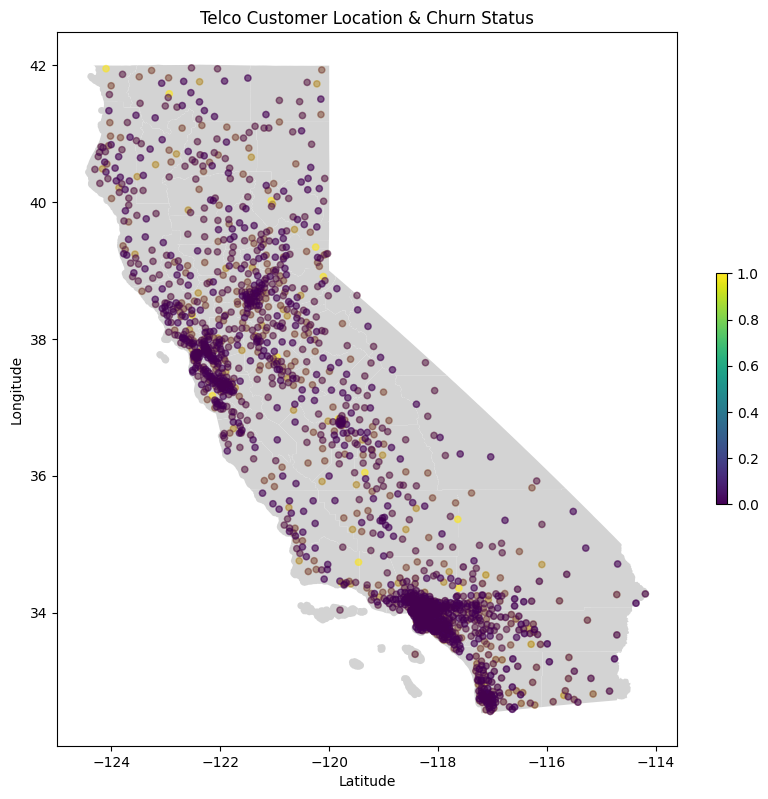

In [21]:
fig, ax = plt.subplots(figsize=(10, 10))
cali_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
geo_df.plot(ax=ax, alpha=0.2, column='Churn Value',
            legend=True, legend_kwds={'shrink': 0.3}, markersize=20, cmap='viridis')
ax.set_title('Telco Customer Location & Churn Status')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

#### Churn

In [22]:
df['Churn Value'].value_counts()

Churn Value
0    5174
1    1869
Name: count, dtype: int64

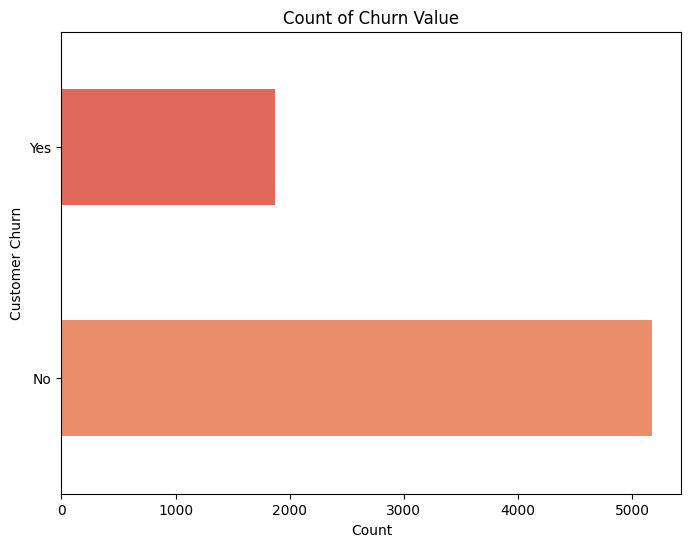

In [23]:
df['Churn Label'].value_counts().plot(
    kind='barh', figsize=(8, 6), color=colour_pal)
plt.ylabel("Customer Churn")
plt.xlabel("Count")
plt.title("Count of Churn Value")
plt.show()

#### Univariate Analysis

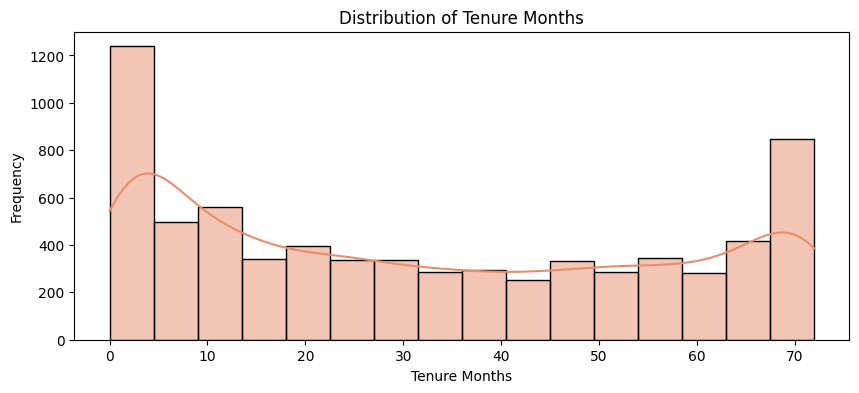

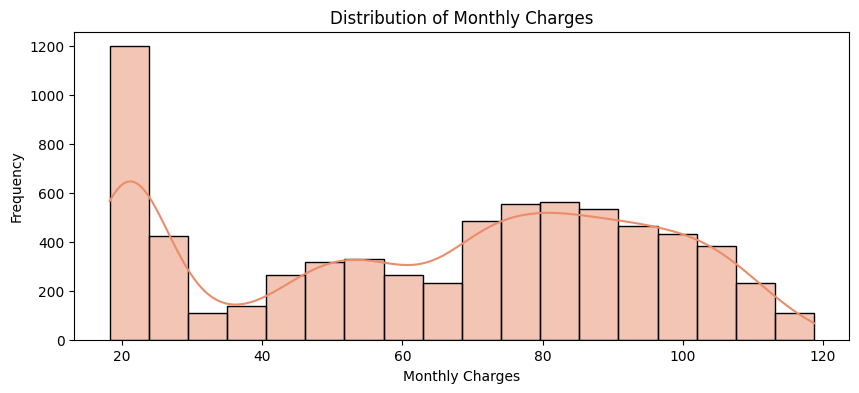

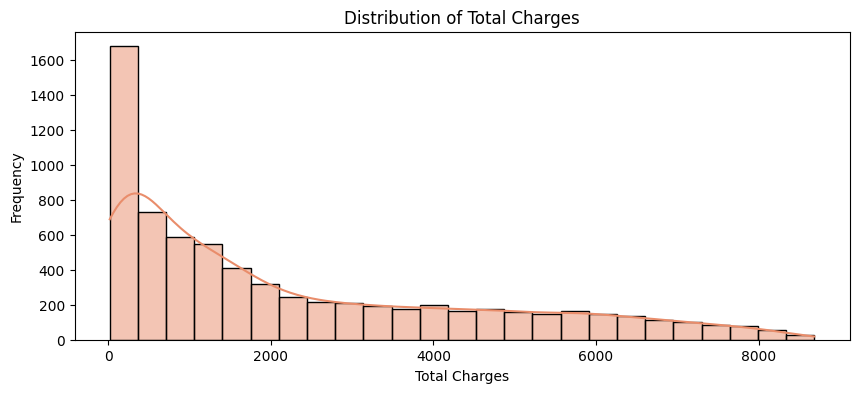

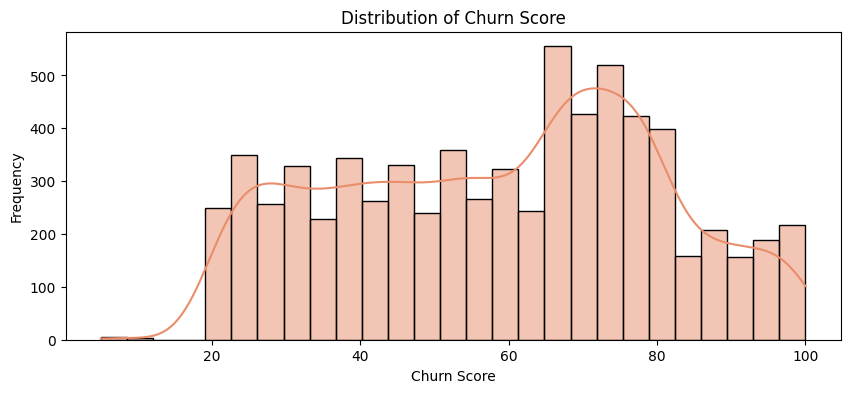

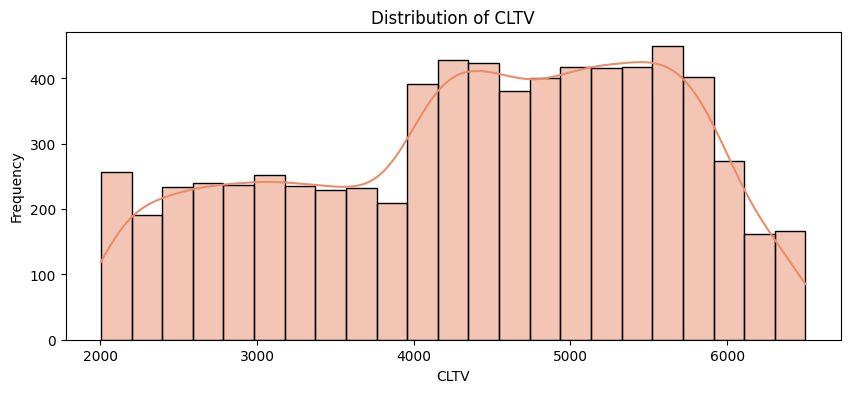

In [24]:
# Univariate analysis of numerical features
numerical_features = ['Tenure Months', 'Monthly Charges',
                      'Total Charges', 'Churn Score', 'CLTV']

for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.histplot(df_drop[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

Categorical Features

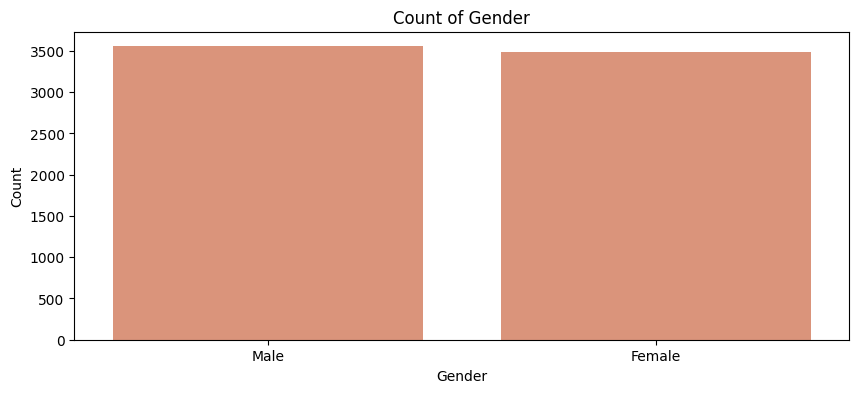

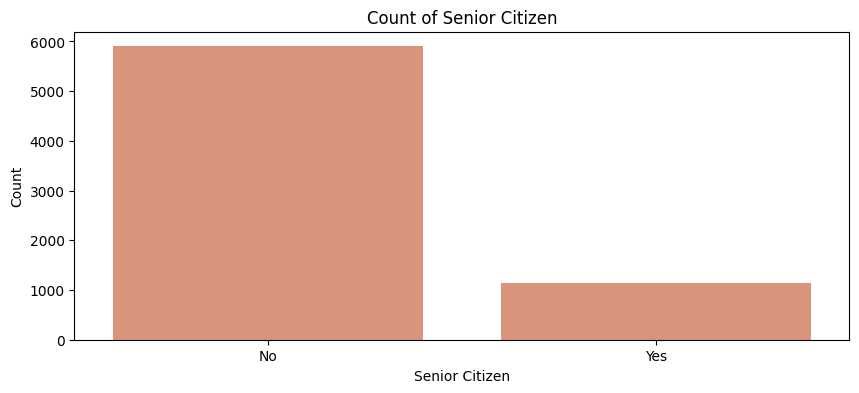

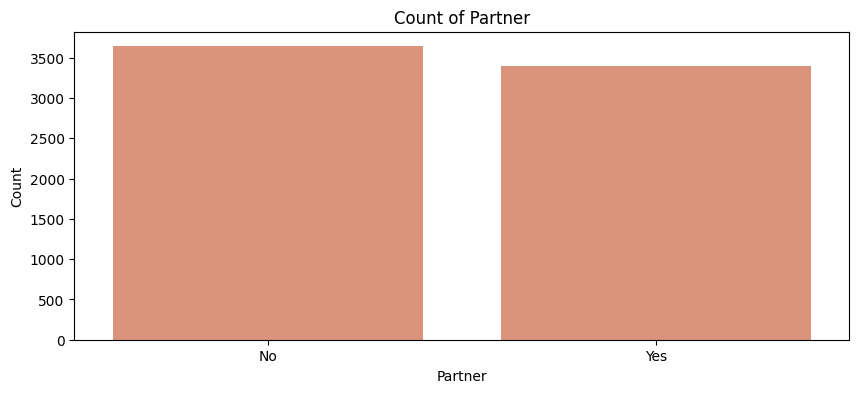

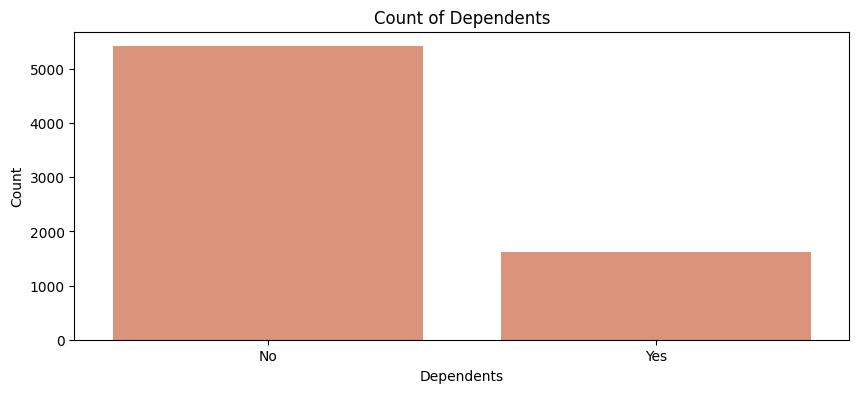

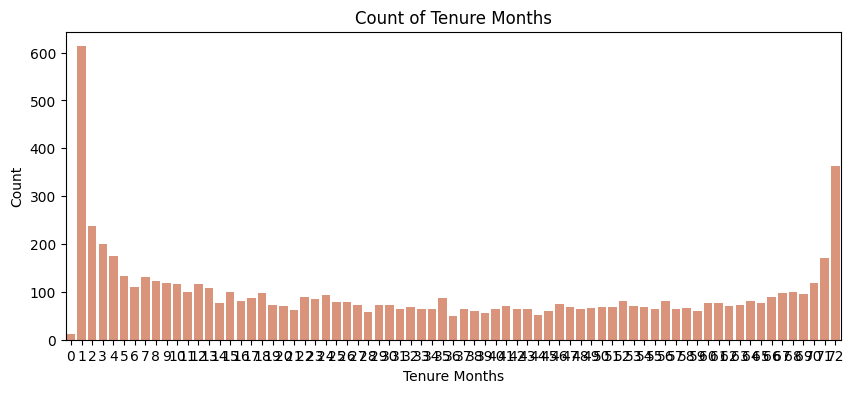

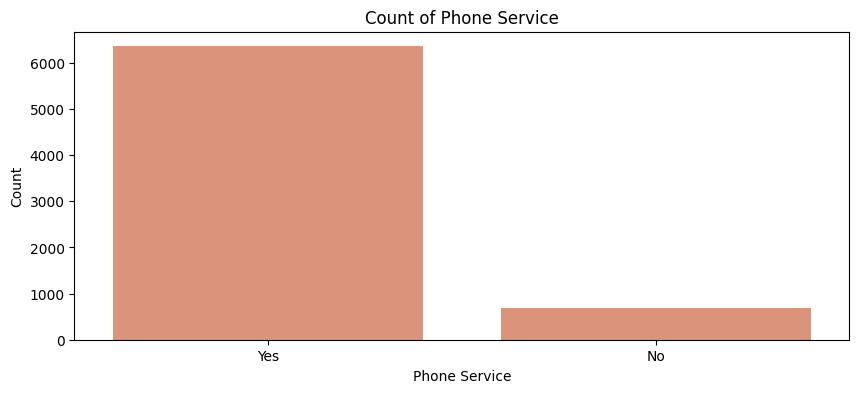

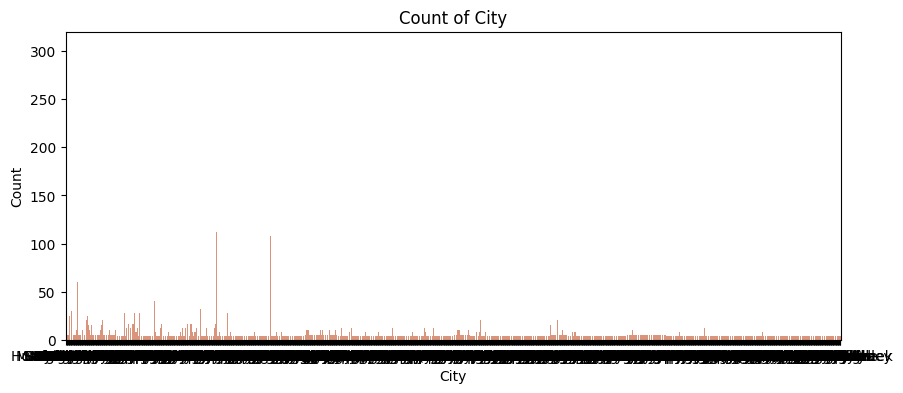

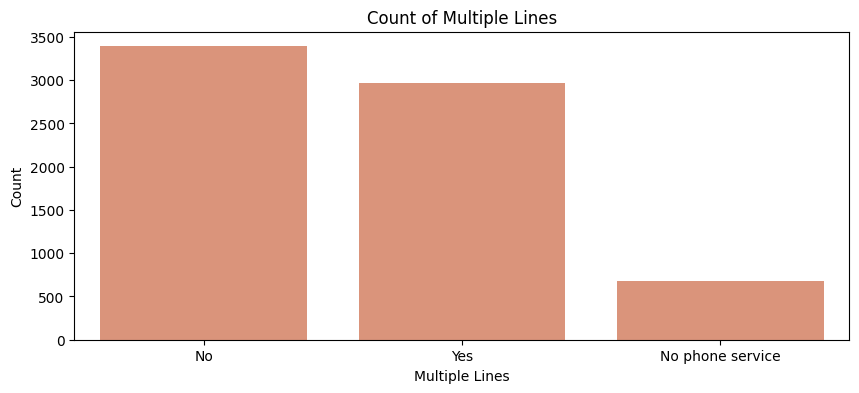

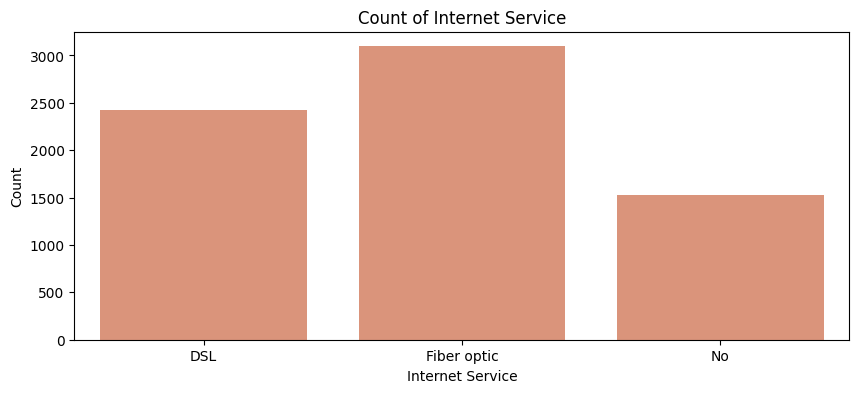

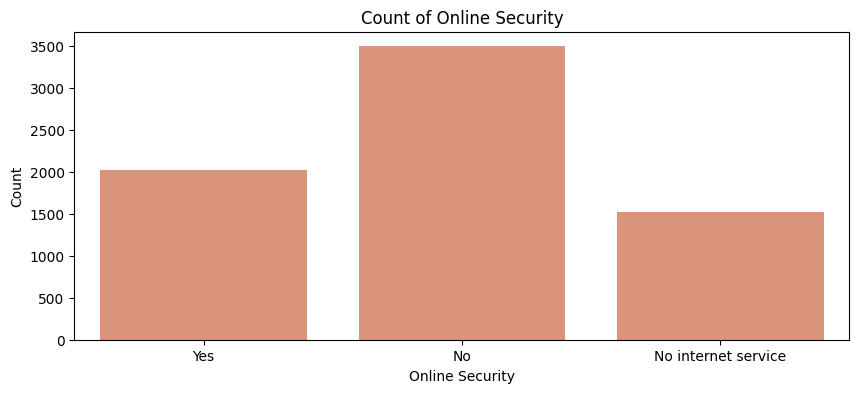

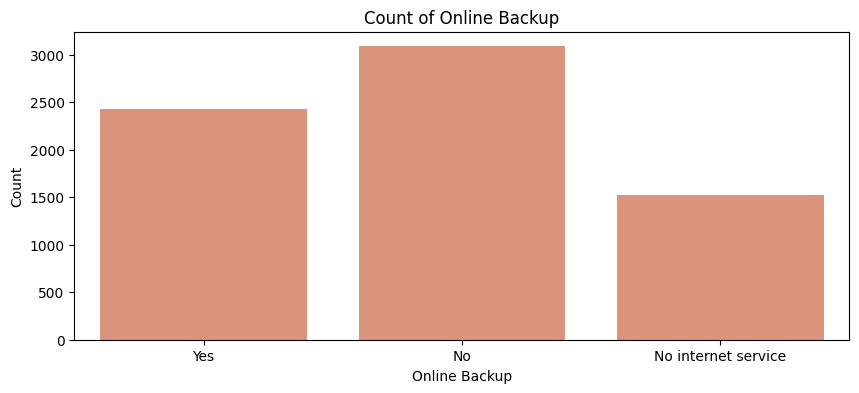

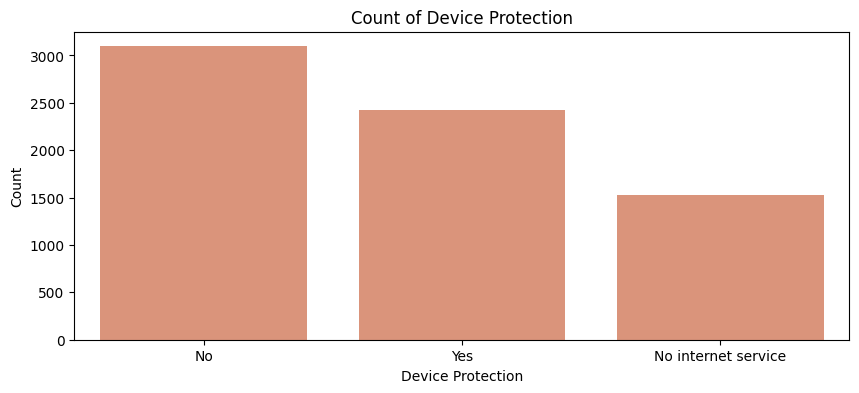

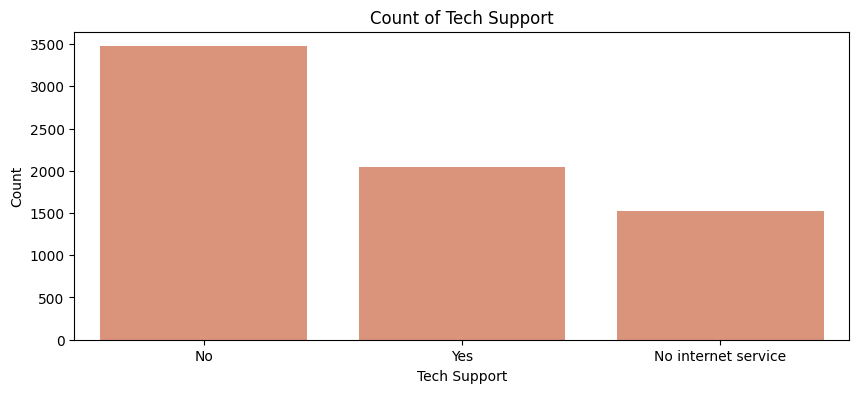

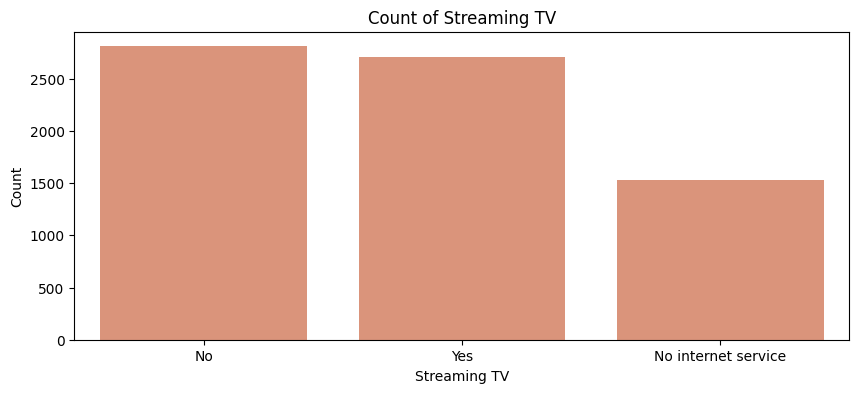

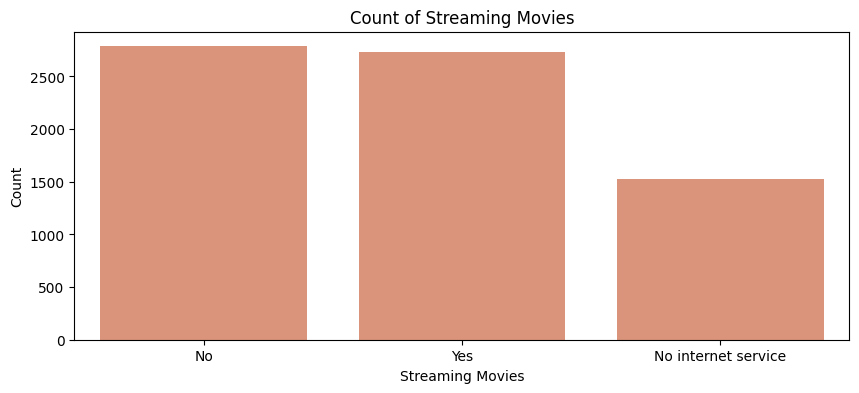

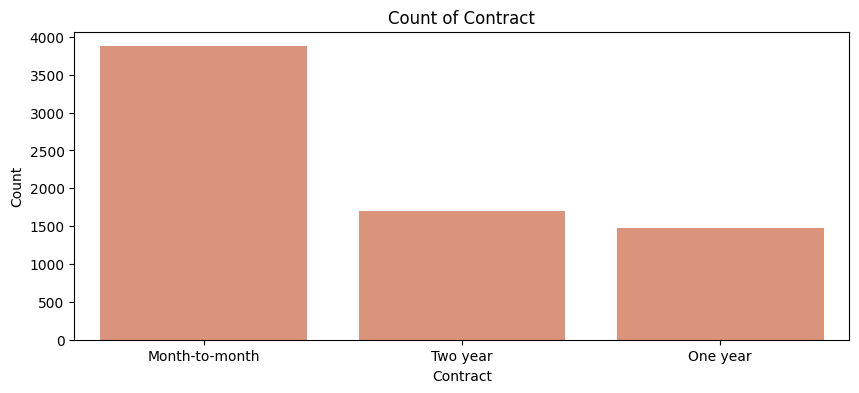

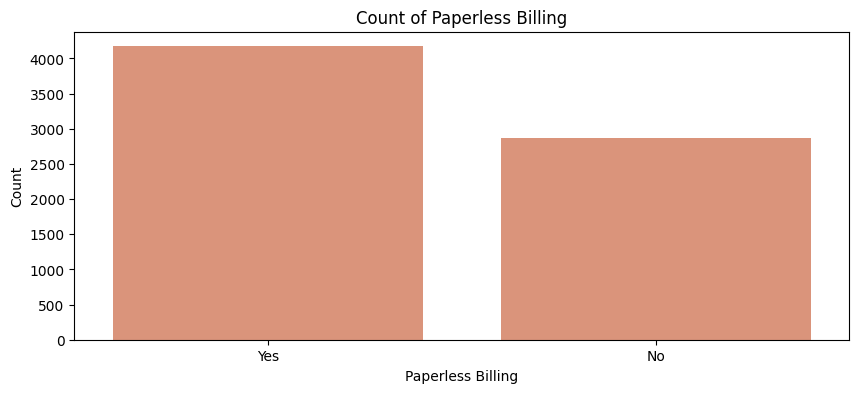

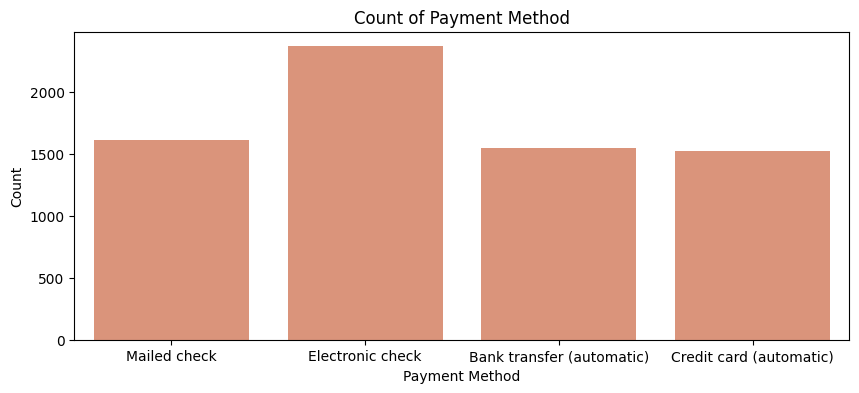

In [25]:
for feature in CAT_COLUMNS:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=feature, data=df_drop)
    plt.title(f'Count of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

#### Bivariate Analysis

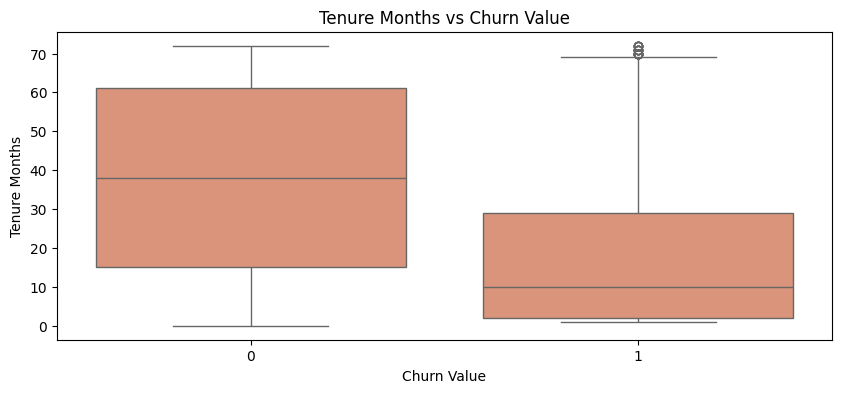

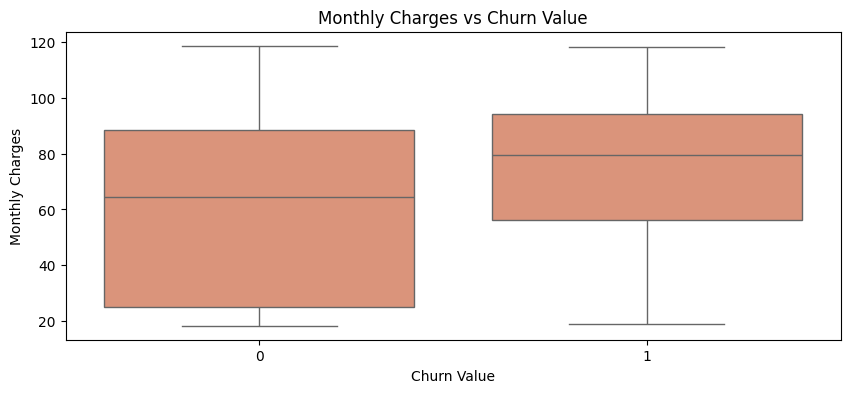

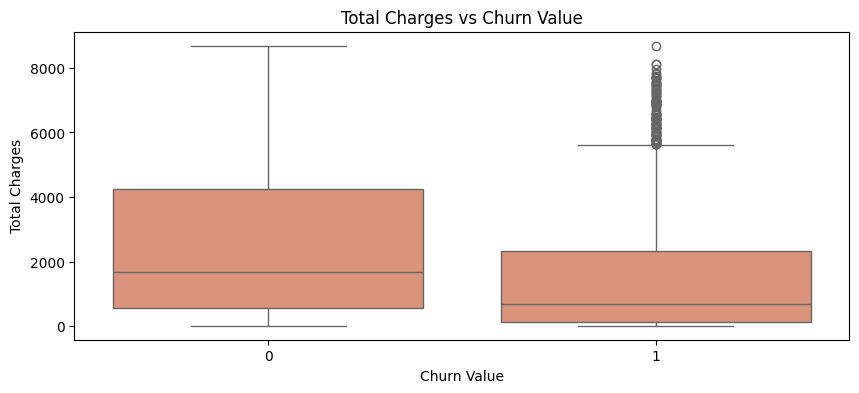

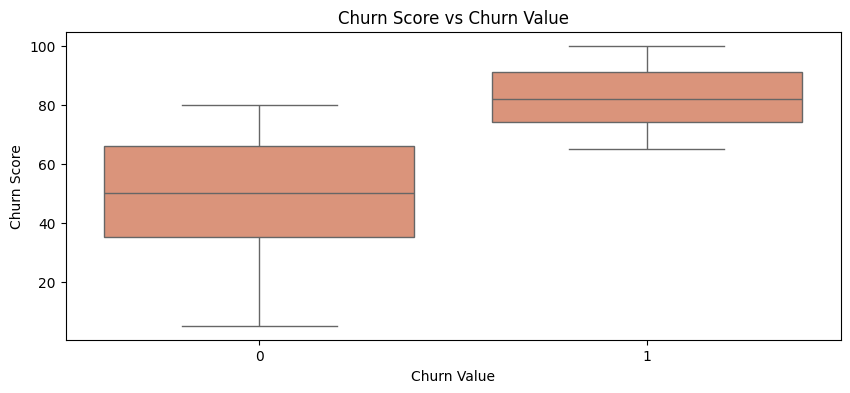

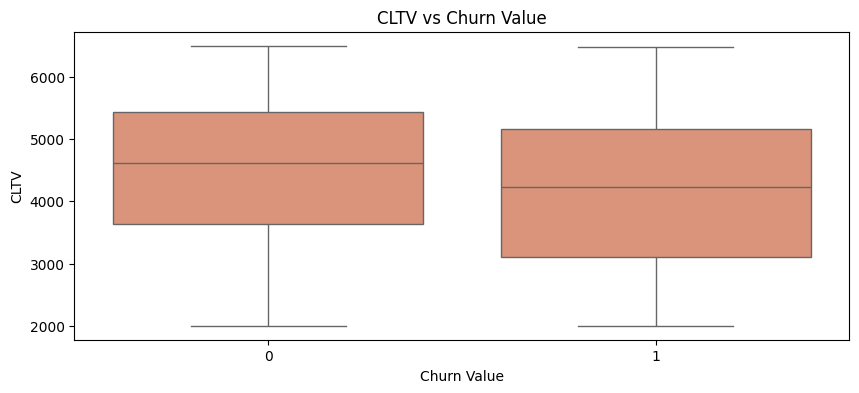

In [26]:
target_variable = 'Churn Value'

for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=target_variable, y=feature, data=df_drop)
    plt.title(f'{feature} vs {target_variable}')
    plt.xlabel(target_variable)
    plt.ylabel(feature)
    plt.show()

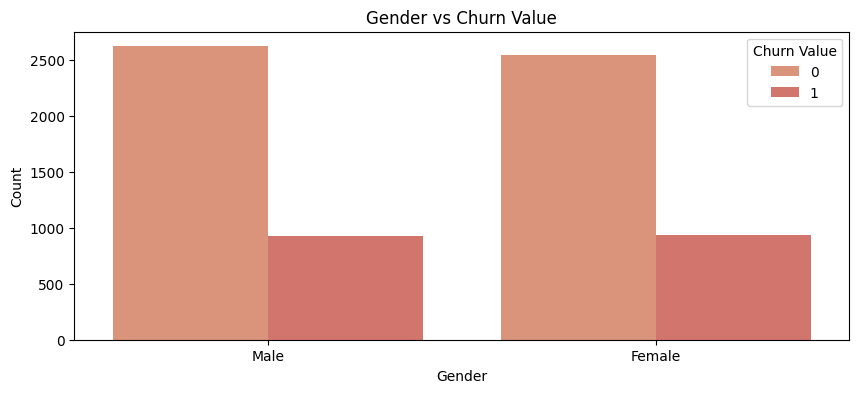

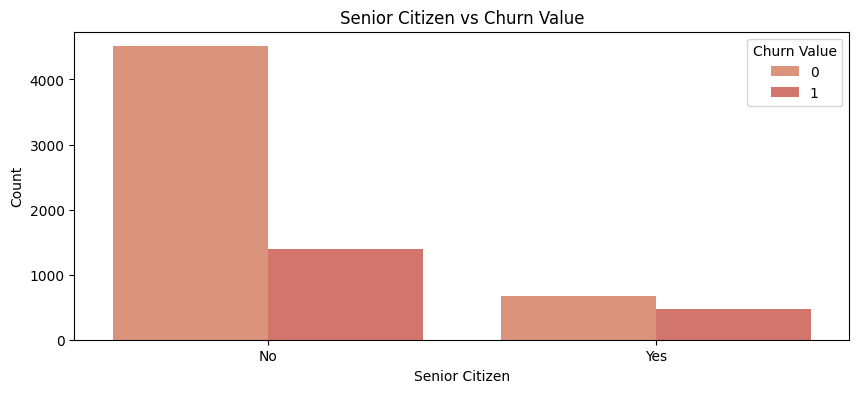

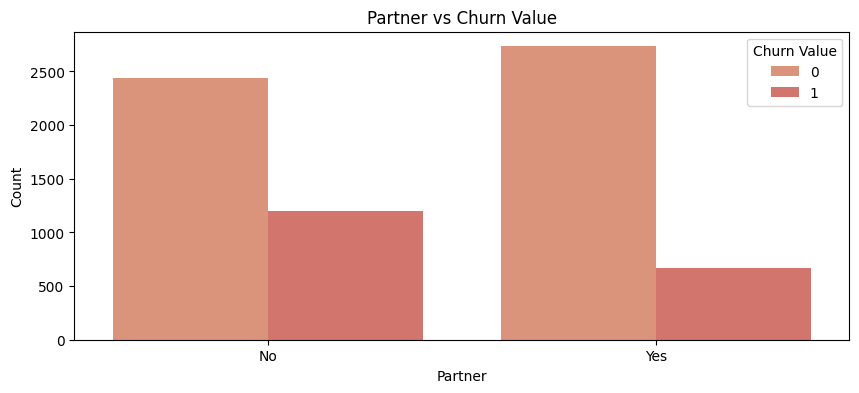

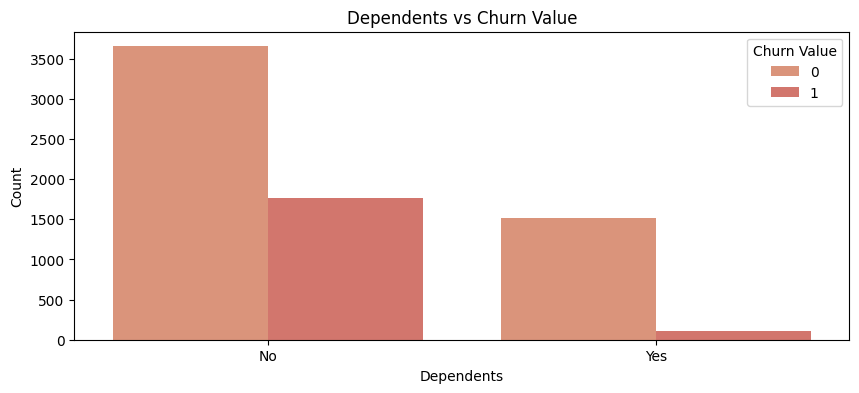

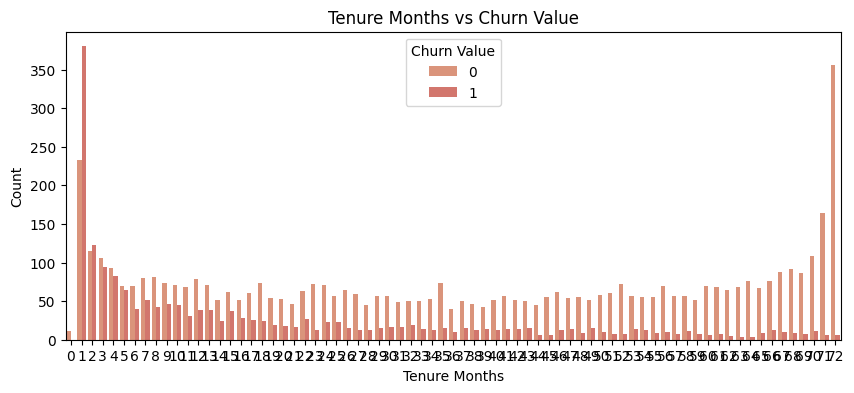

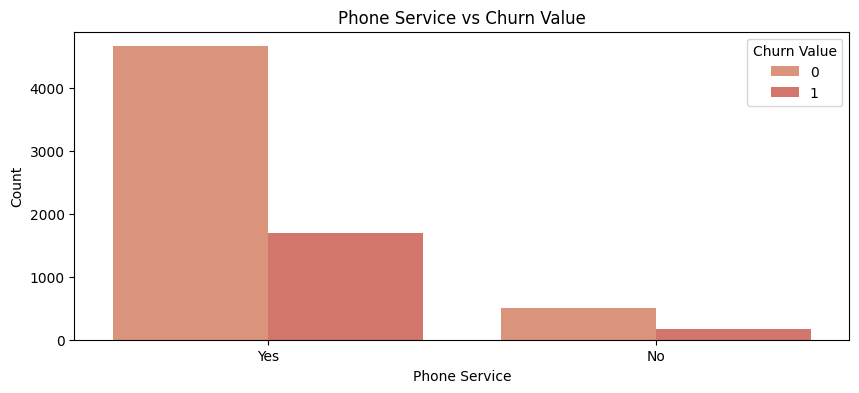

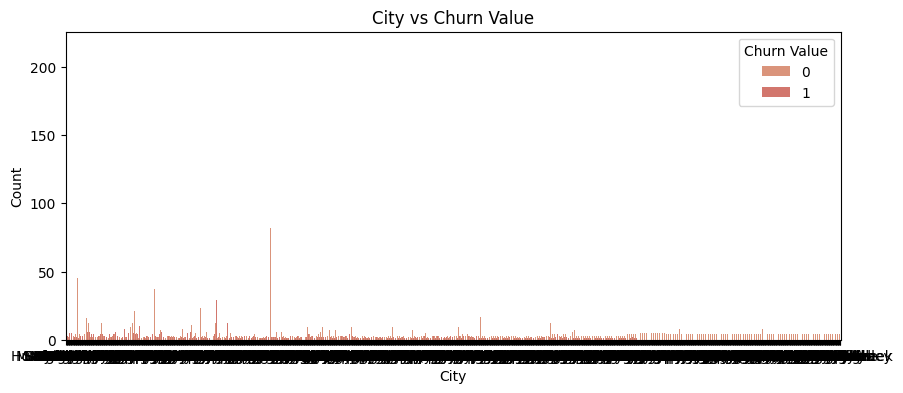

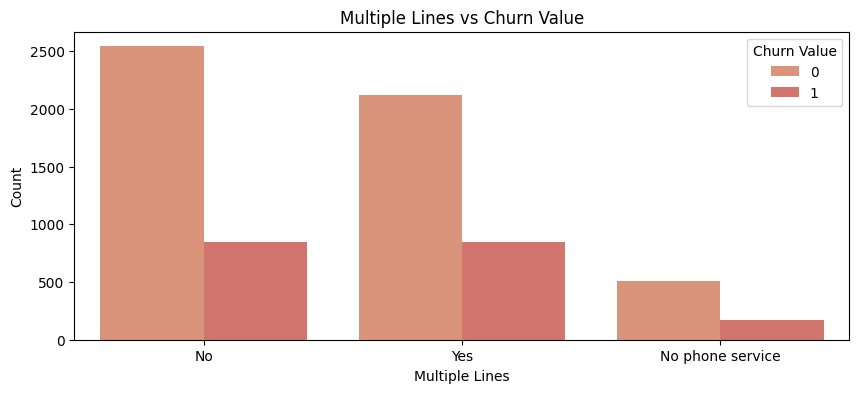

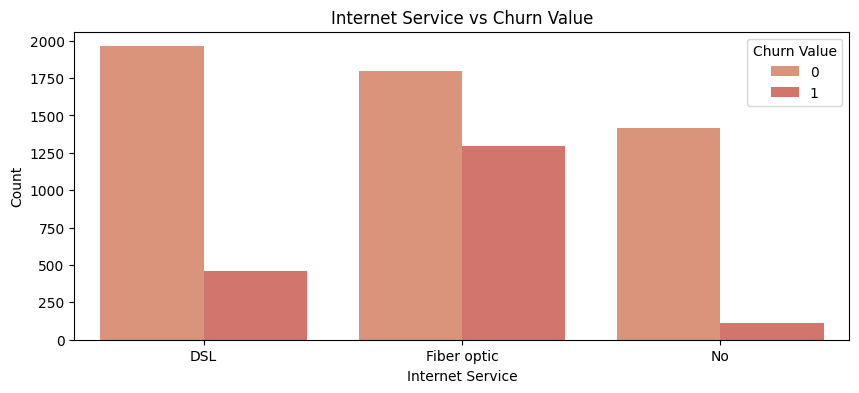

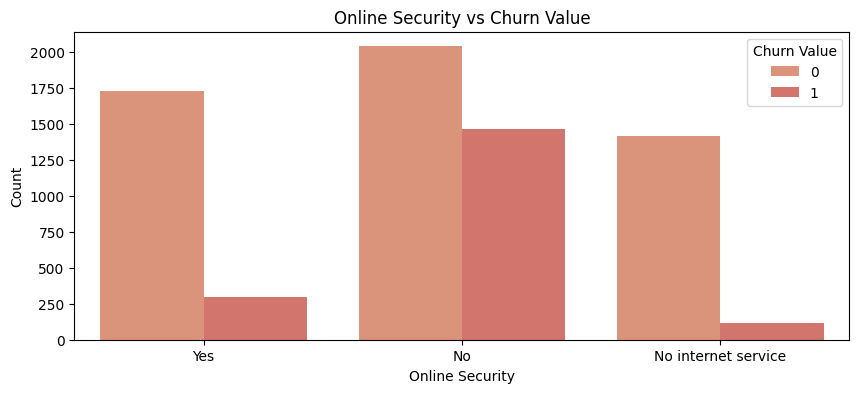

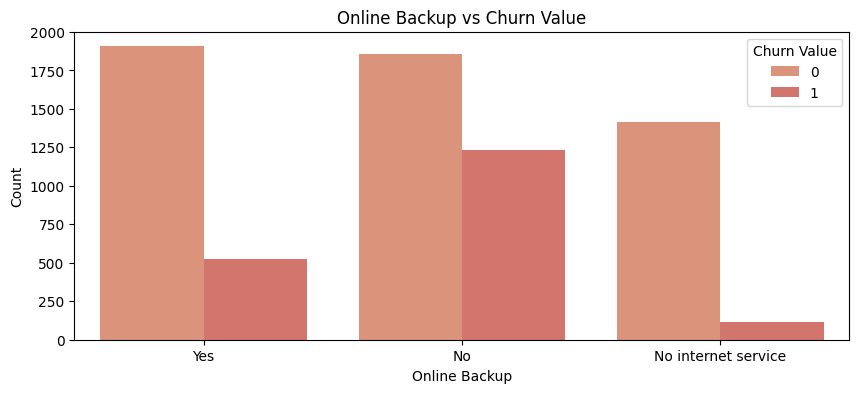

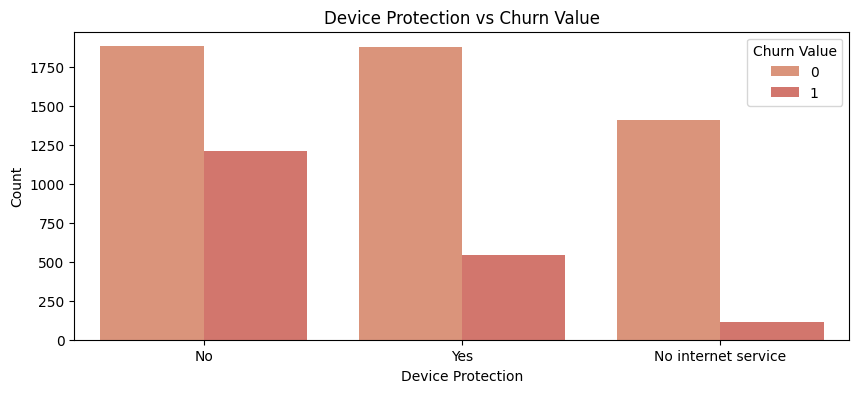

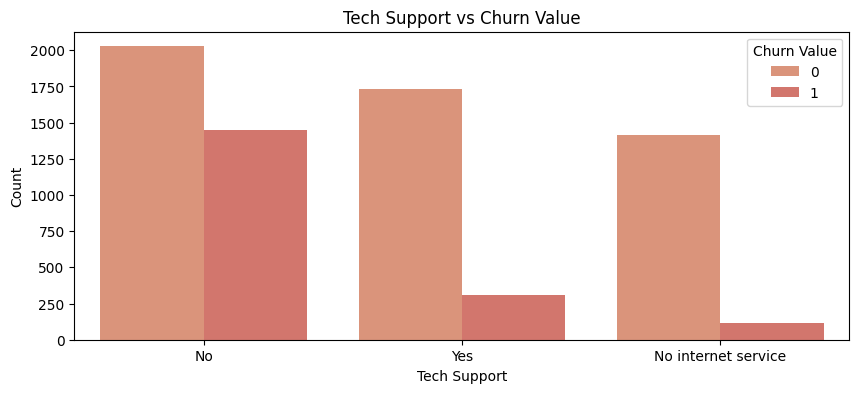

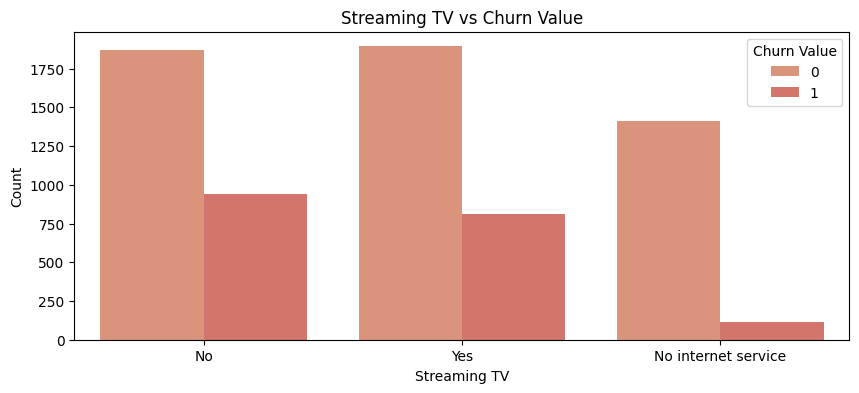

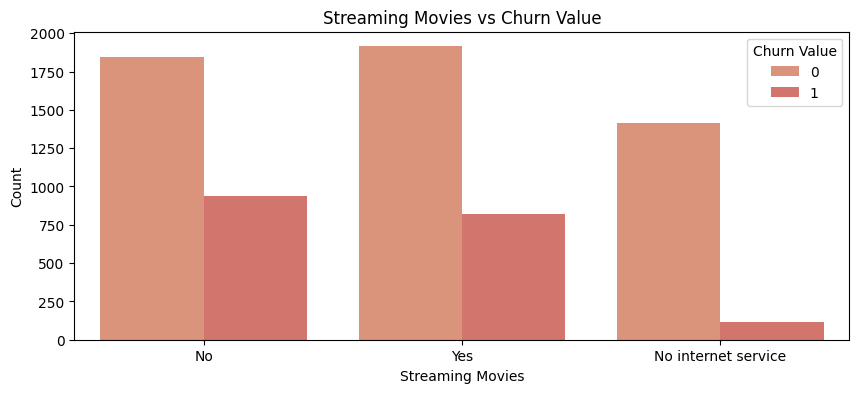

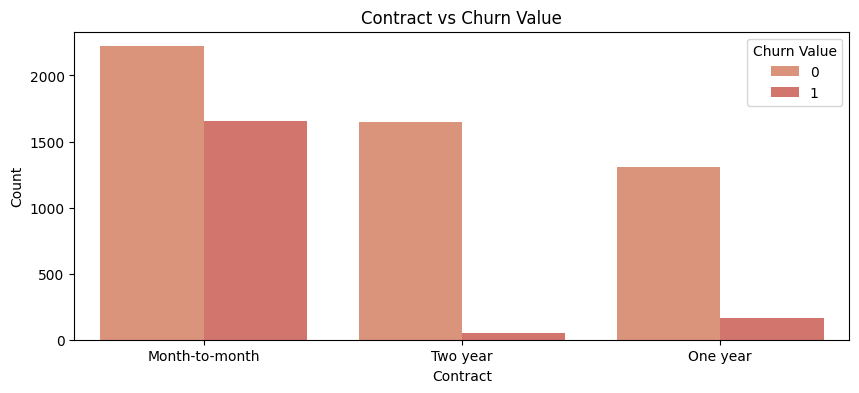

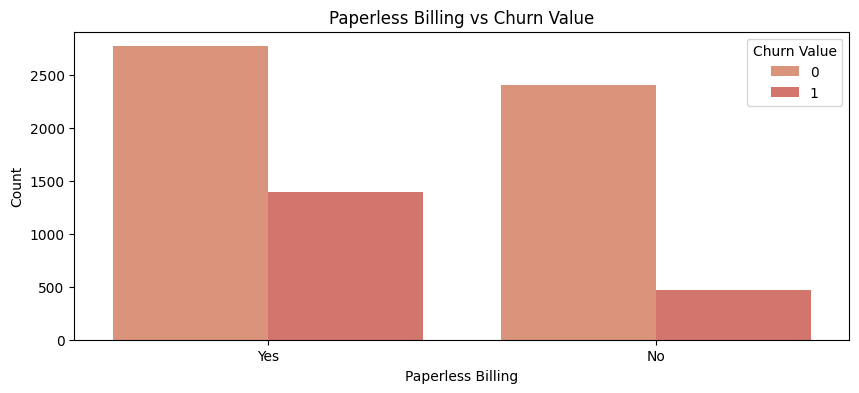

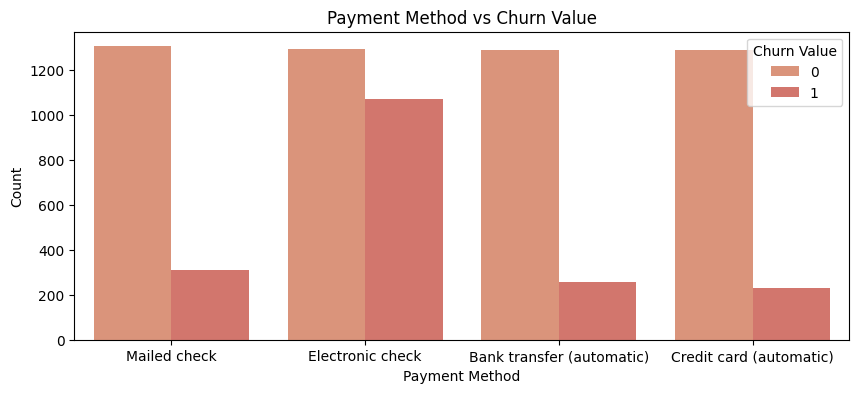

In [27]:
for feature in CAT_COLUMNS:
    if feature != 'Churn Value':
        plt.figure(figsize=(10, 4))
        sns.countplot(x=feature, hue=target_variable, data=df_drop)
        plt.title(f'{feature} vs {target_variable}')
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.show()

## Model

### Split Sets

In [28]:
X_train, X_, y_train, y_ = train_test_split(df_encode, df_encode['Churn Value'], test_size=0.4, random_state=43)

In [29]:
print(f'X_train Shape: {X_train.shape} \ny_train shape: {y_train.shape}')
print(f'X_ Shape: {X_.shape} \ny_ shape: {y_.shape}')

X_train Shape: (4225, 1253) 
y_train shape: (4225,)
X_ Shape: (2818, 1253) 
y_ shape: (2818,)


In [30]:
x_cv, x_test, y_cv, y_test = train_test_split(
    X_, y_, test_size=0.50, random_state=1)
del X_, y_

In [31]:
print(f'x_cv Shape: {x_cv.shape} \ny_cv shape: {y_cv.shape}')
print(f'x_test Shape: {x_test.shape} \ny_test shape: {y_test.shape}')

x_cv Shape: (1409, 1253) 
y_cv shape: (1409,)
x_test Shape: (1409, 1253) 
y_test shape: (1409,)


### Feature Scaling (Non-Binary Columns)

In [32]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
print(f"Computed mean of the training set: {scaler.mean_.squeeze()}")
print(f"Computed standard deviation of the training set: {scaler.scale_.squeeze()}")

Computed mean of the training set: [ 9.35349948e+04  3.62917103e+01 -1.19811476e+02 ...  2.20355030e-01
  3.35621302e-01  2.24852071e-01]
Computed standard deviation of the training set: [1.86263421e+03 2.46712976e+00 2.18028583e+00 ... 4.14486056e-01
 4.72207204e-01 4.17484871e-01]


In [33]:
x_cv_scaled = scaler.transform(x_cv)
x_test_scaled = scaler.transform(x_test)

### Logistic Regression (Baseline)

In [34]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve


In [35]:
sgd_classifier = SGDClassifier(loss='log_loss', penalty='l2', alpha=0.01, max_iter=1000, tol=1e-3, random_state=42)

sgd_classifier.fit(X_train_scaled, y_train)

SGDClassifier(alpha=0.01, loss='log_loss', random_state=42)

In [36]:
y_pred = sgd_classifier.predict(x_cv_scaled)

accuracy = accuracy_score(y_cv, y_pred)
report = classification_report(y_cv, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.9375443577004968
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1043
           1       1.00      0.76      0.86       366

    accuracy                           0.94      1409
   macro avg       0.96      0.88      0.91      1409
weighted avg       0.94      0.94      0.93      1409



In [37]:
roc_auc_score(y_cv, y_pred)

0.8797814207650273

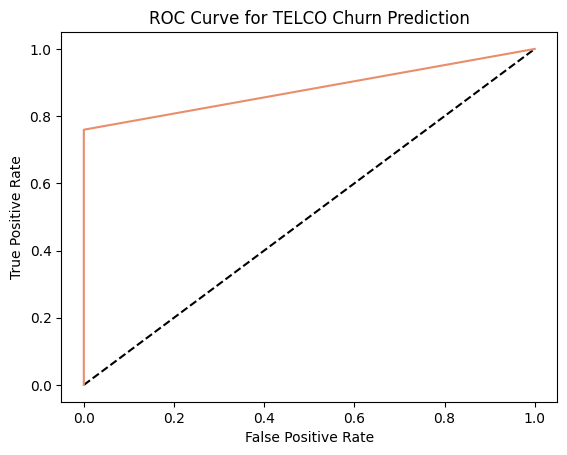

In [38]:
 # Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_cv, y_pred)
    
plt.plot([0, 1], [0, 1], 'k--')
    
# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for TELCO Churn Prediction')
plt.show()

## Gradient Boosting (XGB)

In [39]:
from xgboost import XGBClassifier

xgb = XGBClassifier(base_score=0.5, booster='gbtree', gamma=0,
                    learning_rate=0.01, early_stopping_rounds=20, max_delta_step=0, max_depth=7,
                    n_estimators=500, objective='binary:logistic', random_state=0,
                    reg_alpha=0, reg_lambda=0, scale_pos_weight=1)

In [40]:
xgb.fit(X_train_scaled, y_train, eval_set=[(X_train_scaled, y_train), (x_cv_scaled, y_cv)])


[0]	validation_0-logloss:0.68320	validation_1-logloss:0.68320
[1]	validation_0-logloss:0.67344	validation_1-logloss:0.67344
[2]	validation_0-logloss:0.66388	validation_1-logloss:0.66388
[3]	validation_0-logloss:0.65451	validation_1-logloss:0.65451
[4]	validation_0-logloss:0.64531	validation_1-logloss:0.64531
[5]	validation_0-logloss:0.63629	validation_1-logloss:0.63629
[6]	validation_0-logloss:0.62744	validation_1-logloss:0.62744
[7]	validation_0-logloss:0.61876	validation_1-logloss:0.61876
[8]	validation_0-logloss:0.61023	validation_1-logloss:0.61023
[9]	validation_0-logloss:0.60187	validation_1-logloss:0.60187
[10]	validation_0-logloss:0.59365	validation_1-logloss:0.59365
[11]	validation_0-logloss:0.58559	validation_1-logloss:0.58559
[12]	validation_0-logloss:0.57767	validation_1-logloss:0.57767
[13]	validation_0-logloss:0.56989	validation_1-logloss:0.56989
[14]	validation_0-logloss:0.56224	validation_1-logloss:0.56224
[15]	validation_0-logloss:0.55474	validation_1-logloss:0.55474
[1

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=20,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
              max_depth=7, max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, random_state=0, ...)

In [41]:
y_pred_xgb = xgb.predict(x_cv_scaled)

accuracy = accuracy_score(y_cv, y_pred_xgb)
report = classification_report(y_cv, y_pred_xgb)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1043
           1       1.00      1.00      1.00       366

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409



In [42]:
roc_auc_score(y_cv, y_pred_xgb)

1.0

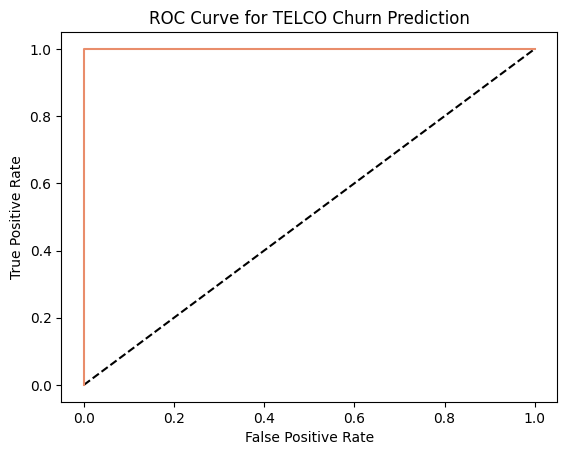

In [43]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_cv, y_pred_xgb)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for TELCO Churn Prediction')
plt.show()

#### Prediction With Holdout Set

In [44]:
y_pred_test = xgb.predict(x_test_scaled)

accuracy = accuracy_score(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1017
           1       1.00      1.00      1.00       392

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409



### Feature Importance 

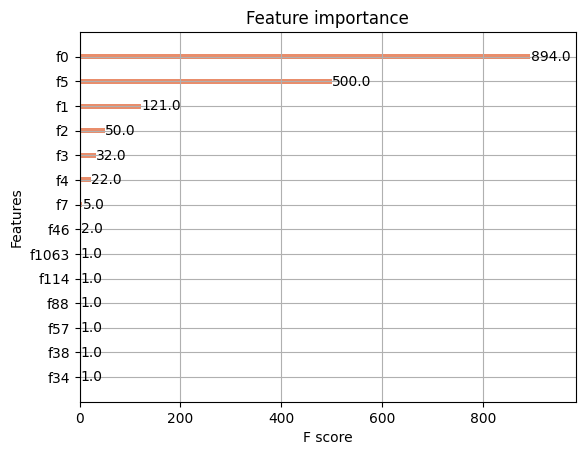

In [48]:
from xgboost import plot_importance

# plot feature importance
plot_importance(xgb)
plt.show()

In [54]:
df_encode.iloc[:,0:8]

,Zip Code,Latitude,Longitude,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
0,90003,33.964131,-118.272783,53.85,108.15,1,86,3239
1,90005,34.059281,-118.307420,70.70,151.65,1,67,2701
2,90006,34.048013,-118.293953,99.65,820.50,1,86,5372
3,90010,34.062125,-118.315709,104.80,3046.05,1,84,5003
4,90015,34.039224,-118.266293,103.70,5036.30,1,89,5340
...,...,...,...,...,...,...,...,...
7038,92285,34.341737,-116.539416,21.15,1419.40,0,45,5306
7039,92301,34.667815,-117.536183,84.80,1990.50,0,59,2140
7040,92304,34.559882,-115.637164,103.20,7362.90,0,71,5560
7041,92305,34.167800,-116.864330,29.60,346.45,0,59,2793


According to xgb feature importance, location (i.e zip code, latitude, longitude), monthly charges, churn score and total charges are the best predictor for whether a customer will churn or not

## Insights & Improvements

Insights on Customer Behavior: Identify key predictors of churn, which can provide actionable insights for customer retention strategies